### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [3]:
lista_alumnos= [["Jalex", 6, 47, 1.80], ["Tomas", 5, 31, 1.80], ["David", 6, 39, 1.81], ["Natalio", 2, 29, 1.73], ["Monica", 3, 47, 1.73], ["Roxanna", 4,24,1.75], ["Filipa", 5,34,1.64], ["Elsa", 4, 36, 1.89], ["Cristina", 3, 46, 1.70], ["Alba", 3, 29, 1.68], ["Valeria",1, 40, 1.60], ["Jose Luis", 4, 47, 1.69], ["Rochi", 2, 38, 1.60], ["Jose Maria", 5, 51, 1.75]]

In [4]:
# Lista alturas
altura=[]
for i in (lista_alumnos):
    x=(i[-1])
    altura.append(x)
altura


[1.8, 1.8, 1.81, 1.73, 1.73, 1.75, 1.64, 1.89, 1.7, 1.68, 1.6, 1.69, 1.6, 1.75]

In [5]:
X=altura
X

[1.8, 1.8, 1.81, 1.73, 1.73, 1.75, 1.64, 1.89, 1.7, 1.68, 1.6, 1.69, 1.6, 1.75]

In [6]:

# Lista edad
edad=[]
for i in (lista_alumnos):
    y=(i[2])
    edad.append(y)
edad

[47, 31, 39, 29, 47, 24, 34, 36, 46, 29, 40, 47, 38, 51]

In [7]:
y=edad
y

[47, 31, 39, 29, 47, 24, 34, 36, 46, 29, 40, 47, 38, 51]

In [8]:
X

[1.8, 1.8, 1.81, 1.73, 1.73, 1.75, 1.64, 1.89, 1.7, 1.68, 1.6, 1.69, 1.6, 1.75]

In [9]:
X=np.array(X)

In [10]:
#Da nueva forma a la matriz sin cambiar sus datos
X = X.reshape(-1, 1)
X.shape

(14, 1)

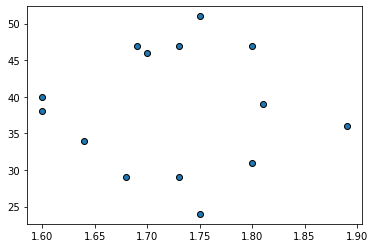

In [11]:
plt.scatter(X,y, edgecolor='black')
#Plot en el que no se aplica todavía el modelo para que aprenda que vamos a crear

In [12]:
#Creamos el modelo, definimos los datos que vamos a utilizar para test y para entrenamiento. Enseñamos al modelo lo que tiene que hacer.

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

train_errors, val_errors = [], []

def plot_learning_curves(model, X, Y):
    X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.20)
    
    for m in range(1, len(X_train)):  # Incremental
        
        x = X_train[:m]
        y = y_train[:m]
        model.fit(x, y)

        y_train_predict = model.predict(x)
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
        if m < 4:
            print("##### ITERACIÓN " + str(m) + " #####")
            print("x", x)
            print("y", y)
            print("y_train_predict", y_train_predict)
            print("-----\nX_val\n", X_val)
            print("y_val_predict", y_val_predict)

    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")

In [14]:
#Esta oparte es la representación del if de la función anterior que nos muestra los errores que ha cometido durante el entrenaniento.

##### ITERACIÓN 1 #####
x [[1.75]]
y [24]
y_train_predict [24.]
-----
X_val
 [[1.81]
 [1.73]
 [1.8 ]]
y_val_predict [24. 24. 24.]
##### ITERACIÓN 2 #####
x [[1.75]
 [1.6 ]]
y [24, 38]
y_train_predict [24. 38.]
-----
X_val
 [[1.81]
 [1.73]
 [1.8 ]]
y_val_predict [18.4        25.86666667 19.33333333]
##### ITERACIÓN 3 #####
x [[1.75]
 [1.6 ]
 [1.64]]
y [24, 38, 34]
y_train_predict [23.9558011  37.87845304 34.16574586]
-----
X_val
 [[1.81]
 [1.73]
 [1.8 ]]
y_val_predict [18.38674033 25.8121547  19.31491713]


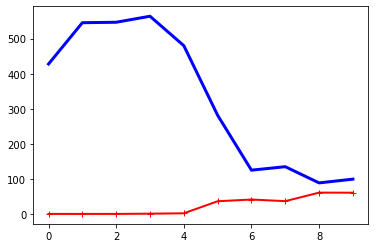

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(model=lin_reg, X=X, Y=y)

In [16]:
# b, Calculamos la pendiente
b = lin_reg.coef_ 
b

array([-11.77741761])

In [17]:
# a, Calculamos la secante
a = lin_reg.intercept_
a

55.98649378714208

In [18]:
#imprimimos los errores de entrenamiento y de test

In [19]:
print("|||||||||||ERRORES||||||||||||")
print("train_errors\n\n", train_errors)
print("val_errors\n\n", val_errors)

|||||||||||ERRORES||||||||||||
train_errors

 [0.0, 0.0, 0.014732965009209988, 0.6865671641791186, 1.7596491228070057, 36.138888888888886, 41.04878364389234, 36.41928583900819, 60.74512998031631, 60.53300918422475]
val_errors

 [427.6666666666667, 545.4740740740737, 546.7650254876222, 563.9114790888019, 479.9788025945306, 281.43518518518584, 124.8165132527525, 134.6942101783491, 88.4886465960313, 99.2016027859039]


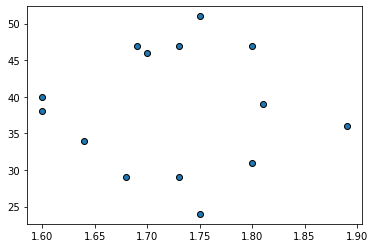

In [20]:
# para inferir
plt.scatter(X,y, edgecolor='black')

In [21]:
#Esta función me sirve para que el modelo se aplique a cualquier nuevo valor que introduzcamos  y el algoritmo no conozca, al que va  a aplicar  el modelo y va a sacar la predicción. 

In [22]:
def predict(model, number):
    to_predict = np.array([number]).reshape(1, -1)
    return model.predict(to_predict)

In [23]:
#Introduzco el nuevo valor

In [24]:
predict(lin_reg, number=3.60)
#multiplico la altura por dos y baja la edad 

array([13.58779038])

In [39]:
predict(lin_reg, number=94)
#multiplico la edad de 47 años por dos y la altura sale negativa porque este modelo de regresión lineal no es quizás el mejor algoritmo para este problema.

array([-1011.73180503])

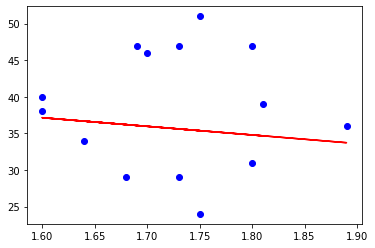

In [26]:
#Dibuja la línea del modelo
plt.scatter(X, y, color='b')
plt.plot(X, lin_reg.predict(X), color='red')

plt.show()

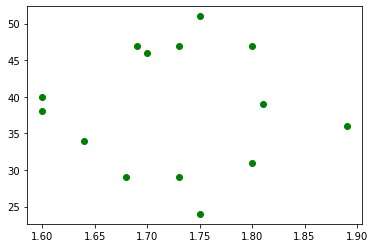

In [27]:
#Entreno al modelo con todos los datos
new_model = LinearRegression()
new_model.fit(X, y)

plt.scatter(X, y, color='g')

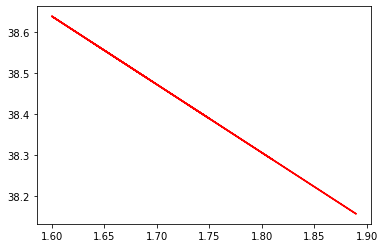

In [28]:
#Prediccion con todos los datos
plt.plot(X, new_model.predict(X), color='red')

In [29]:

print(new_model.score(X,y)*100)
#Efectividad de nuestro algoritmo, en esta caso muy mala

0.027293595026511852


In [30]:

df=pd.DataFrame(lista_alumnos)


In [31]:
df.columns=["nombres","mesa","años","altura"]
del(df["mesa"])
df

,nombres,años,altura
0,Jalex,47,1.80
1,Tomas,31,1.80
2,David,39,1.81
3,Natalio,29,1.73
4,Monica,47,1.73
5,Roxanna,24,1.75
6,Filipa,34,1.64
7,Elsa,36,1.89
8,Cristina,46,1.70
9,Alba,29,1.68


In [32]:
#No hay correlación significativa entre la altura y la edad

,años,altura
años,1.000000,-0.016521
altura,-0.016521,1.000000


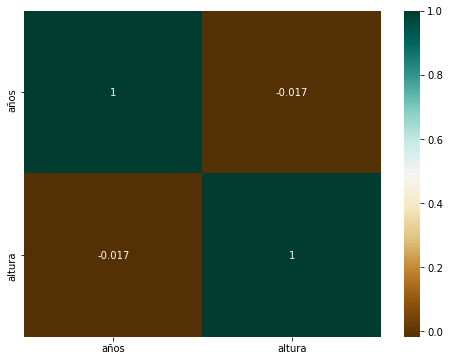

In [33]:
plt.figure(figsize=(8,6))
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [34]:
lin_reg = LinearRegression()

In [35]:
  #Defino nuevamente las variables porque estban definidas dentro de la función y para que las reconozca debo volver a definnir X_val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20)

In [36]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [37]:
predictions = lin_reg.predict(X_val)

In [38]:
print('MAE:', metrics.mean_absolute_error(y_val, predictions))
print('MSE:', metrics.mean_squared_error(y_val, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, predictions)))

MAE: 12.89843460197344
MSE: 170.28662161897296
RMSE: 13.0493916187297
